In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from autoviz.classify_method import data_cleaning_suggestions ,data_suggestions
from sklearn import set_config; set_config(display='diagram')

In [3]:
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

# EDA and Pre-processing

In [9]:
train.head(10)

id  squareMeters  numberOfRooms  hasYard  hasPool  floors  cityCode  \
0   0         34291             24        1        0      47     35693   
1   1         95145             60        0        1      60     34773   
2   2         92661             45        1        1      62     45457   
3   3         97184             99        0        0      59     15113   
4   4         61752            100        0        0      57     64245   
5   5         30300             36        0        0      35     19069   
6   6         19341             95        1        0      37     23939   
7   7         58110              3        1        0       1     67658   
8   8         20537             84        0        1      44      9560   
9   9         89396             35        1        1      96     33928   

   cityPartRange  numPrevOwners  made  isNewBuilt  hasStormProtector  \
0              2              1  2000           0                  1   
1              1              4  2000           0                  1   
2              4              8  2020           1                  1   
3              1              1  2000           0                  1   
4              8              4  2018           1                  0   
5              8              4  1998           1                  0   
6              9              6  2017           0                  0   
7              8              4  2003           1                  0   
8              3             10  1994           0                  0   
9              6              7  1993           0                  0   

   basement  attic  garage  hasStorageRoom  hasGuestRoom      price  
0         8   5196     369               0             3  3436795.2  
1       729   4496     277               0             6  9519958.0  
2      7473   8953     245               1             9  9276448.1  
3      6424   8522     256               1             9  9725732.2  
4      7151   2786     863               0             7  6181908.8  
5      8181   1826     589               0             0  3033117.8  
6      7173   9233     101               0             3  1944096.7  
7      3164   3389     499               1             5  5814953.3  
8      5026   7669     191               0             9  2056267.4  
9      7936   2956     414               0             1  8949480.3

In [10]:
train.columns

Index(['id', 'squareMeters', 'numberOfRooms', 'hasYard', 'hasPool', 'floors',
       'cityCode', 'cityPartRange', 'numPrevOwners', 'made', 'isNewBuilt',
       'hasStormProtector', 'basement', 'attic', 'garage', 'hasStorageRoom',
       'hasGuestRoom', 'price'],
      dtype='object')

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22730 entries, 0 to 22729
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 22730 non-null  int64  
 1   squareMeters       22730 non-null  int64  
 2   numberOfRooms      22730 non-null  int64  
 3   hasYard            22730 non-null  int64  
 4   hasPool            22730 non-null  int64  
 5   floors             22730 non-null  int64  
 6   cityCode           22730 non-null  int64  
 7   cityPartRange      22730 non-null  int64  
 8   numPrevOwners      22730 non-null  int64  
 9   made               22730 non-null  int64  
 10  isNewBuilt         22730 non-null  int64  
 11  hasStormProtector  22730 non-null  int64  
 12  basement           22730 non-null  int64  
 13  attic              22730 non-null  int64  
 14  garage             22730 non-null  int64  
 15  hasStorageRoom     22730 non-null  int64  
 16  hasGuestRoom       227

In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15154 entries, 0 to 15153
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   id                 15154 non-null  int64
 1   squareMeters       15154 non-null  int64
 2   numberOfRooms      15154 non-null  int64
 3   hasYard            15154 non-null  int64
 4   hasPool            15154 non-null  int64
 5   floors             15154 non-null  int64
 6   cityCode           15154 non-null  int64
 7   cityPartRange      15154 non-null  int64
 8   numPrevOwners      15154 non-null  int64
 9   made               15154 non-null  int64
 10  isNewBuilt         15154 non-null  int64
 11  hasStormProtector  15154 non-null  int64
 12  basement           15154 non-null  int64
 13  attic              15154 non-null  int64
 14  garage             15154 non-null  int64
 15  hasStorageRoom     15154 non-null  int64
 16  hasGuestRoom       15154 non-null  int64
dtypes: int64(17)

In [11]:
data_cleaning_suggestions(train)

Data cleaning improvement suggestions. Complete them before proceeding to ML modeling.


In [12]:
train.describe().T

count          mean           std      min         25%  \
id                 22704.0  1.136412e+04  6.560705e+03      0.0     5685.75   
squareMeters       22704.0  4.631754e+04  2.925077e+04     89.0    20392.00   
numberOfRooms      22704.0  4.823009e+01  2.822807e+01      1.0       25.00   
hasYard            22704.0  4.761276e-01  4.994408e-01      0.0        0.00   
hasPool            22704.0  4.527837e-01  4.977766e-01      0.0        0.00   
floors             22704.0  4.703898e+01  2.690009e+01      1.0       25.00   
cityCode           22704.0  4.994663e+04  2.967516e+04      3.0    22936.00   
cityPartRange      22704.0  5.584082e+00  2.739843e+00      1.0        3.00   
numPrevOwners      22704.0  5.620331e+00  2.713461e+00      1.0        3.00   
made               22704.0  2.006245e+03  8.121963e+00   1990.0     2000.00   
isNewBuilt         22704.0  4.681554e-01  4.989959e-01      0.0        0.00   
hasStormProtector  22704.0  4.598749e-01  4.983984e-01      0.0        0.00   
basement           22704.0  5.268769e+03  2.844347e+03      4.0     2976.75   
attic              22704.0  5.049271e+03  2.898345e+03      1.0     2598.25   
garage             22704.0  5.299564e+02  2.688204e+02      4.0      297.00   
hasStorageRoom     22704.0  4.618129e-01  4.985506e-01      0.0        0.00   
hasGuestRoom       22704.0  5.154774e+00  3.055162e+00      0.0        3.00   
price              22704.0  4.634029e+06  2.925651e+06  10313.5  2041030.15   

                         50%         75%         max  
id                   11362.5    17044.25     22729.0  
squareMeters         44484.0    71543.00    146181.0  
numberOfRooms           47.0       75.00       100.0  
hasYard                  0.0        1.00         1.0  
hasPool                  0.0        1.00         1.0  
floors                  45.0       69.00       100.0  
cityCode             50409.0    76290.00    146275.0  
cityPartRange            6.0        8.00        10.0  
numPrevOwners            6.0        8.00        10.0  
made                  2006.0     2014.00      2021.0  
isNewBuilt               0.0        1.00         1.0  
hasStormProtector        0.0        1.00         1.0  
basement              5359.0     7745.00     10000.0  
attic                 4975.0     7651.00     10000.0  
garage                 515.0      766.00      1000.0  
hasStorageRoom           0.0        1.00         1.0  
hasGuestRoom             5.0        8.00        10.0  
price              4450823.4  7159919.50  10004278.3

In [5]:
train.duplicated().sum()

0

In [6]:
test.duplicated().sum()

0

### No missing values or duplicates to handle

### Removing outliers on train data

In [4]:
#FUNCTION TO DETECT OUTLIERS
def detect_outliers(data):
    outlier_percents = {}
    for column in data.columns:
        q1 = np.quantile(data[column], 0.25)
        q3 = np.quantile(data[column], 0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
        outlier_percent = (outliers.shape[0] / data.shape[0]) * 100
        outlier_percents[column] = outlier_percent
        
    outlier_dataframe = pd.DataFrame(data = outlier_percents.values() ,index=outlier_percents.keys() ,columns=['Outlier_percentage'])
    
    return outlier_dataframe.sort_values(by = 'Outlier_percentage')


detect_outliers(train)

Outlier_percentage
id                           0.000000
hasStorageRoom               0.000000
hasStormProtector            0.000000
isNewBuilt                   0.000000
hasGuestRoom                 0.000000
cityPartRange                0.000000
numPrevOwners                0.000000
hasPool                      0.000000
hasYard                      0.000000
numberOfRooms                0.000000
price                        0.000000
floors                       0.004399
squareMeters                 0.004399
garage                       0.008799
basement                     0.017598
made                         0.021997
cityCode                     0.026397
attic                        0.030796

In [5]:
def outlier_removal(data , i):
    q1 = np.quantile(data[i] ,0.25)
    q3 = np.quantile(data[i] , 0.75)
    iqr = q3-q1
    lower_tail = q1 - 1.5*iqr
    upper_tail = q3 + 1.5*iqr
    data.drop(data[data[i]> upper_tail].index , inplace = True)
    data.drop(data[data[i]< lower_tail].index ,inplace =True)
    
outlier_list = ['squareMeters' ,'floors','garage' ,'basement' ,'made' ,'cityCode' ,'attic']
for  i in outlier_list:
    outlier_removal(train ,i)

### Feature Engineering

In [12]:
# train['made'].nunique()
# train['made'].min()
# train['made'].max() 
# train['made'].mean()

32

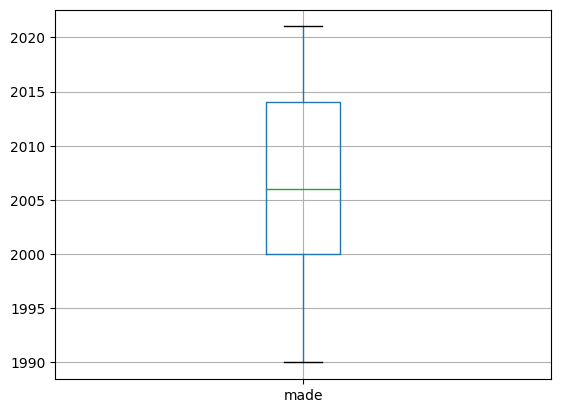

In [26]:
train[['made']].boxplot();

In [6]:
train['made_category'] = pd.cut(x = train['made'],
                                 bins=4, 
                                 labels=['really_old', 'old', 'new', 'brand_new'])

train.head(10)

id  squareMeters  numberOfRooms  hasYard  hasPool  floors  cityCode  \
0   0         34291             24        1        0      47     35693   
1   1         95145             60        0        1      60     34773   
2   2         92661             45        1        1      62     45457   
3   3         97184             99        0        0      59     15113   
4   4         61752            100        0        0      57     64245   
5   5         30300             36        0        0      35     19069   
6   6         19341             95        1        0      37     23939   
7   7         58110              3        1        0       1     67658   
8   8         20537             84        0        1      44      9560   
9   9         89396             35        1        1      96     33928   

   cityPartRange  numPrevOwners  made  isNewBuilt  hasStormProtector  \
0              2              1  2000           0                  1   
1              1              4  2000           0                  1   
2              4              8  2020           1                  1   
3              1              1  2000           0                  1   
4              8              4  2018           1                  0   
5              8              4  1998           1                  0   
6              9              6  2017           0                  0   
7              8              4  2003           1                  0   
8              3             10  1994           0                  0   
9              6              7  1993           0                  0   

   basement  attic  garage  hasStorageRoom  hasGuestRoom      price  \
0         8   5196     369               0             3  3436795.2   
1       729   4496     277               0             6  9519958.0   
2      7473   8953     245               1             9  9276448.1   
3      6424   8522     256               1             9  9725732.2   
4      7151   2786     863               0             7  6181908.8   
5      8181   1826     589               0             0  3033117.8   
6      7173   9233     101               0             3  1944096.7   
7      3164   3389     499               1             5  5814953.3   
8      5026   7669     191               0             9  2056267.4   
9      7936   2956     414               0             1  8949480.3   

  made_category  
0           old  
1           old  
2     brand_new  
3           old  
4     brand_new  
5           old  
6     brand_new  
7           old  
8    really_old  
9    really_old

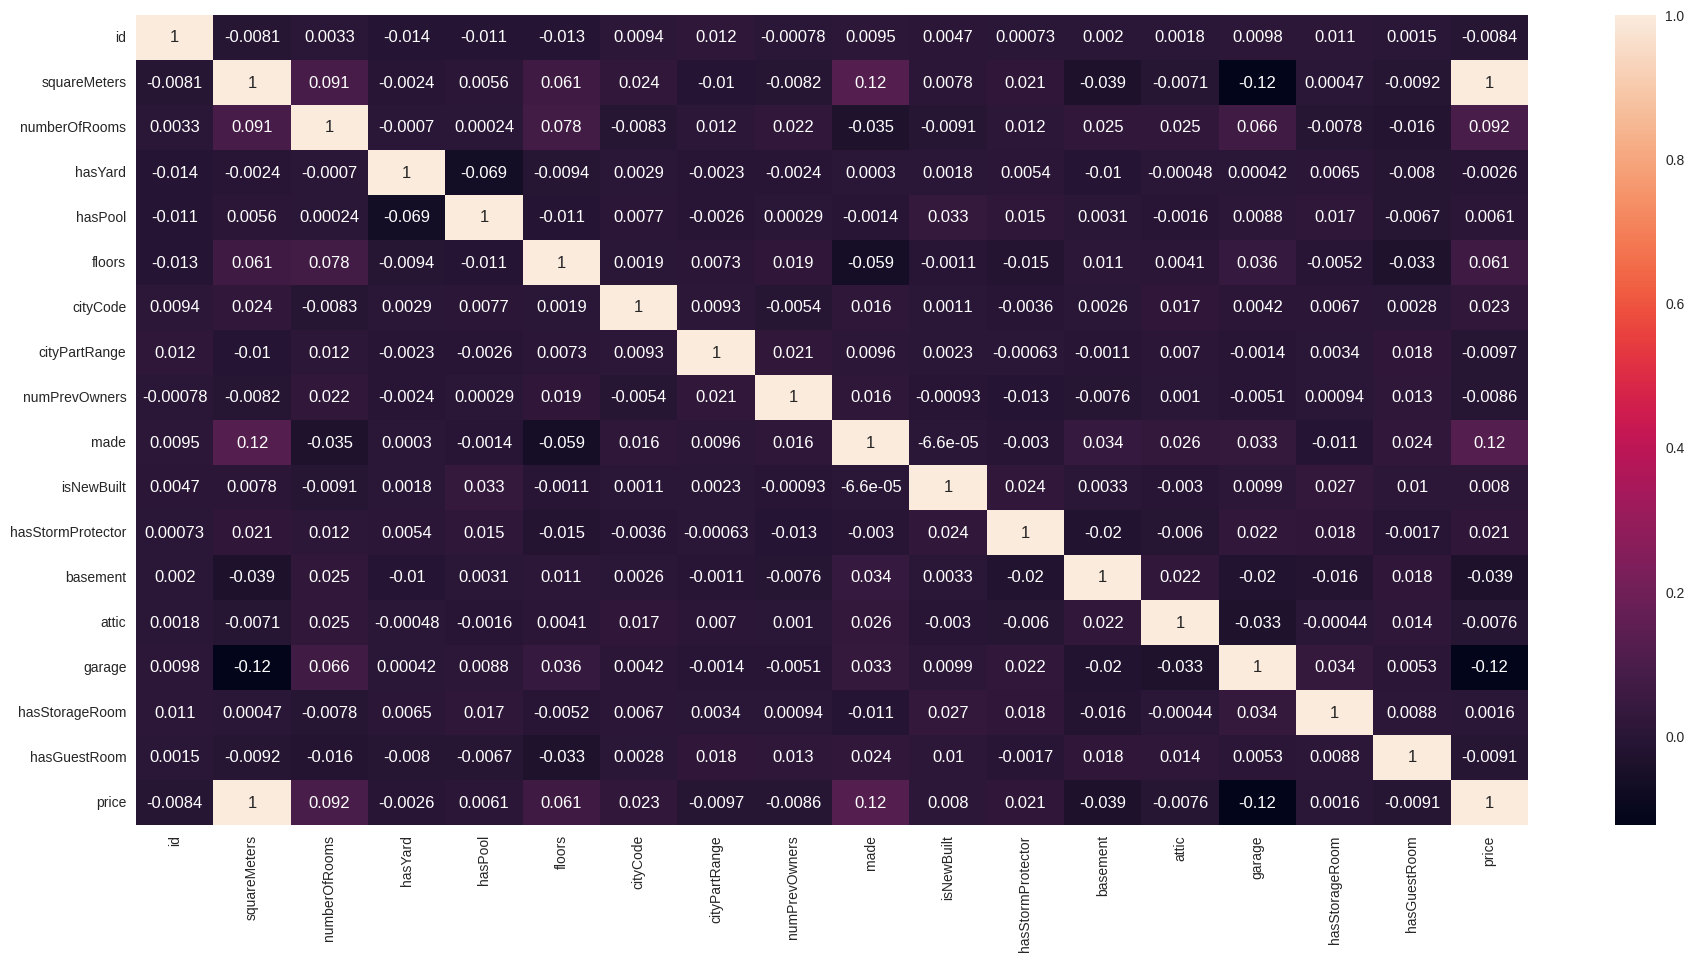

In [14]:
plt.figure(figsize=(20,10))
sns.heatmap(train.corr(),annot=True);

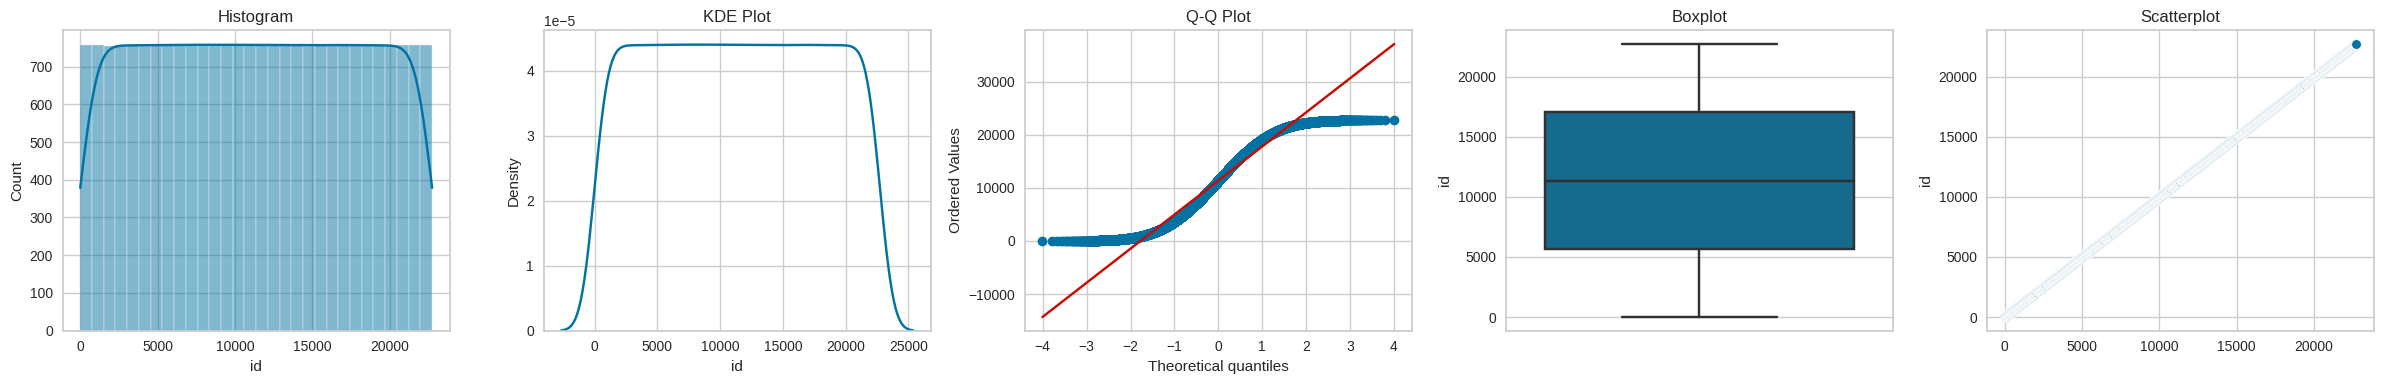

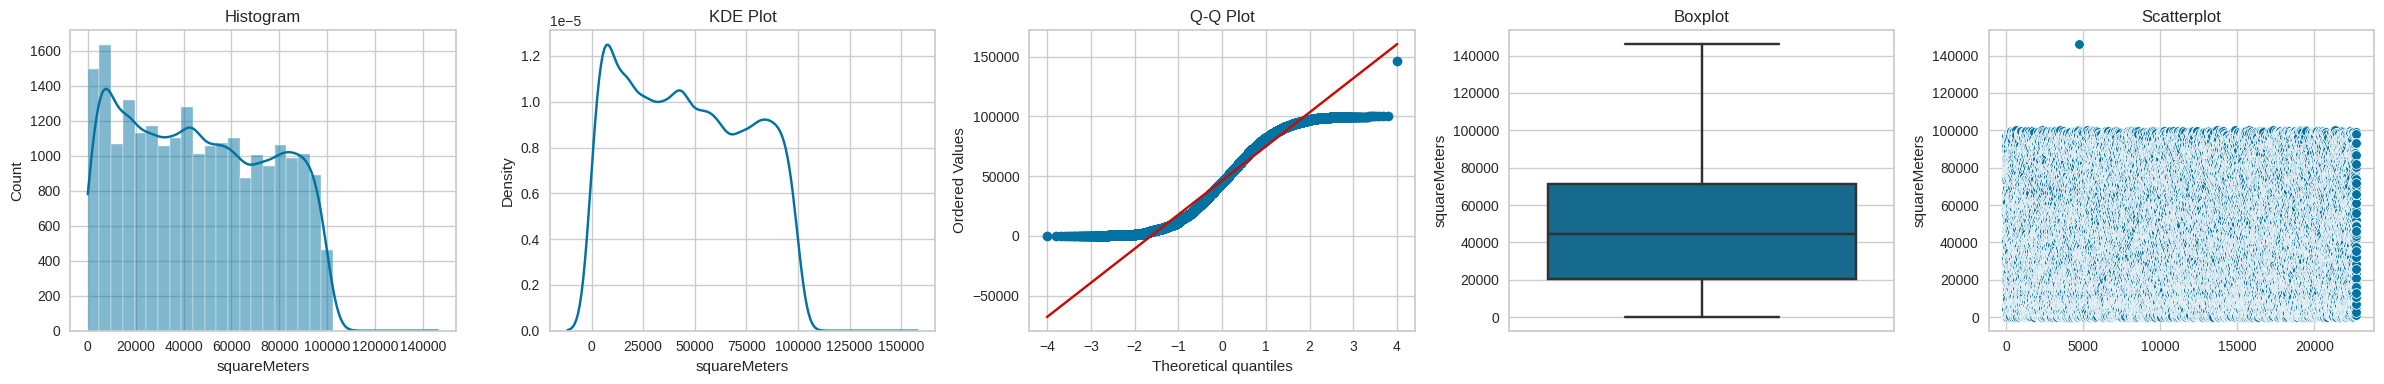

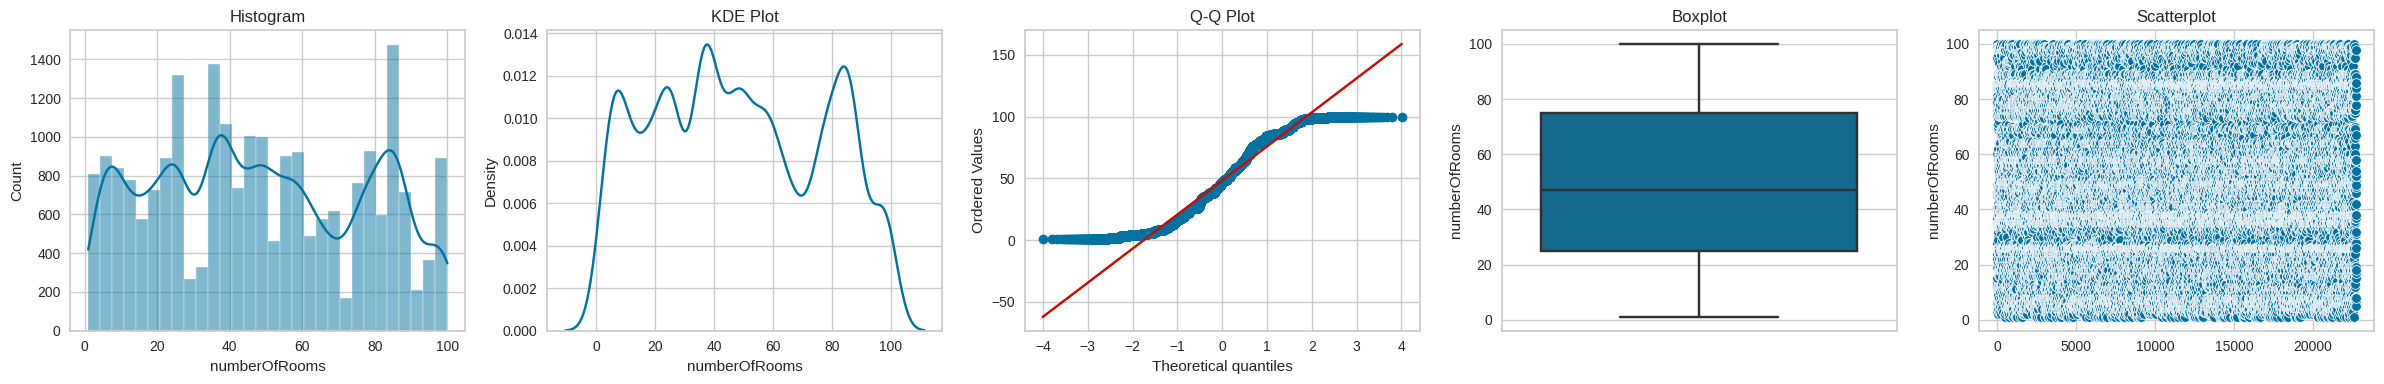

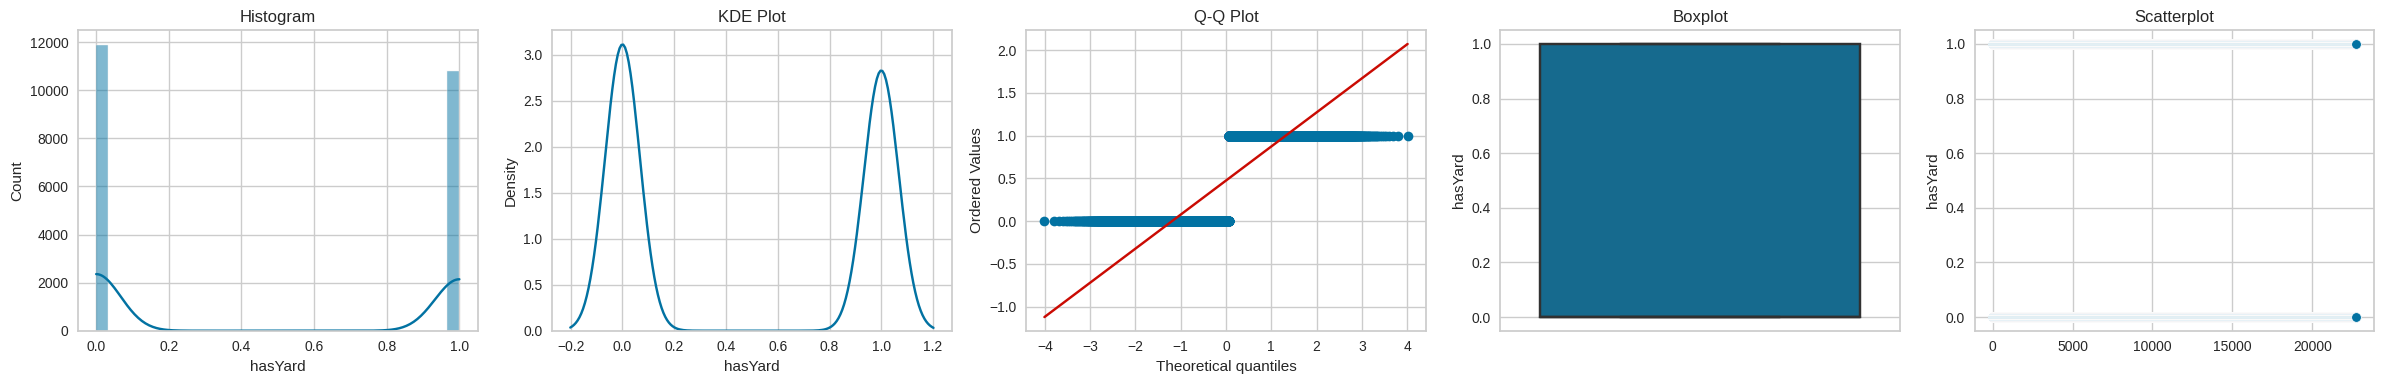

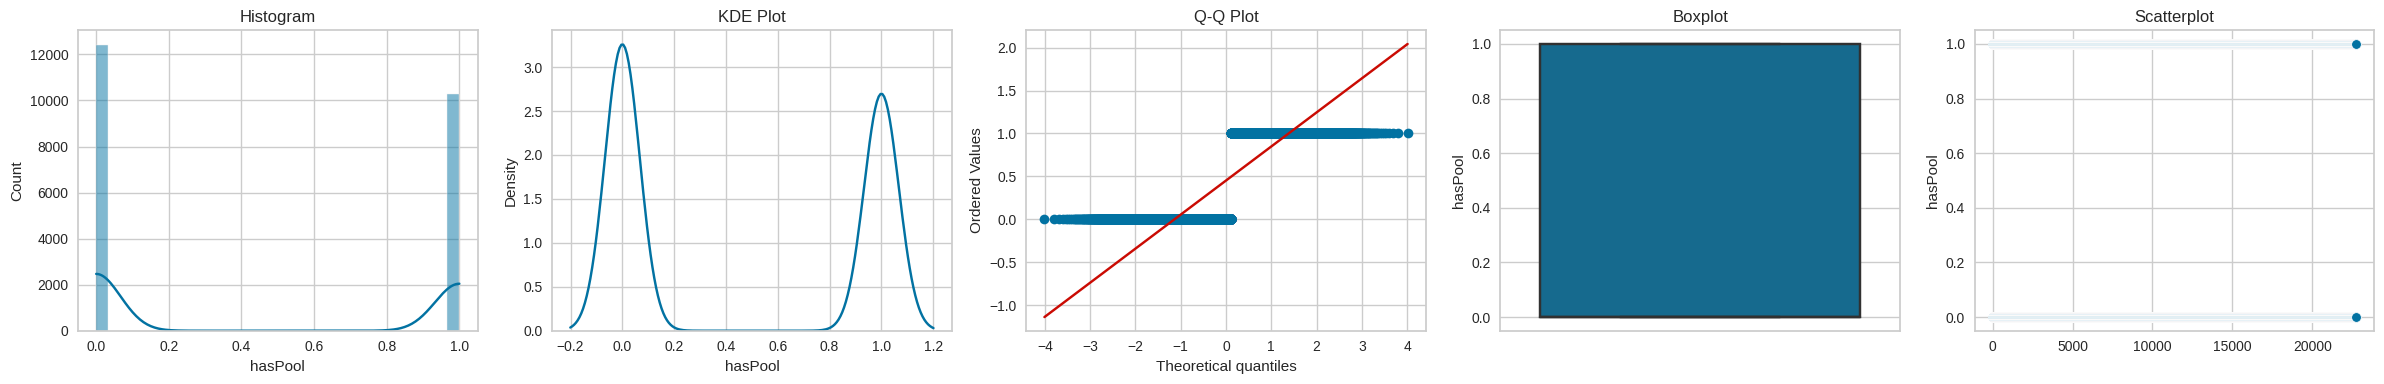

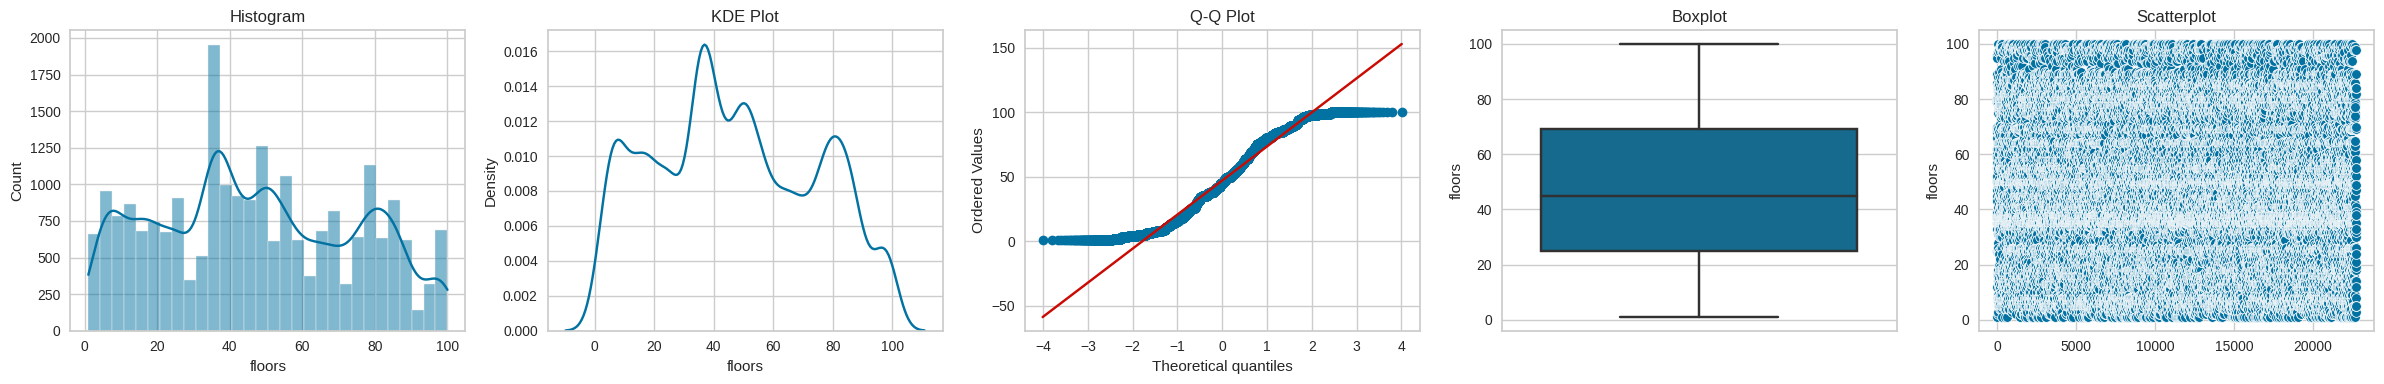

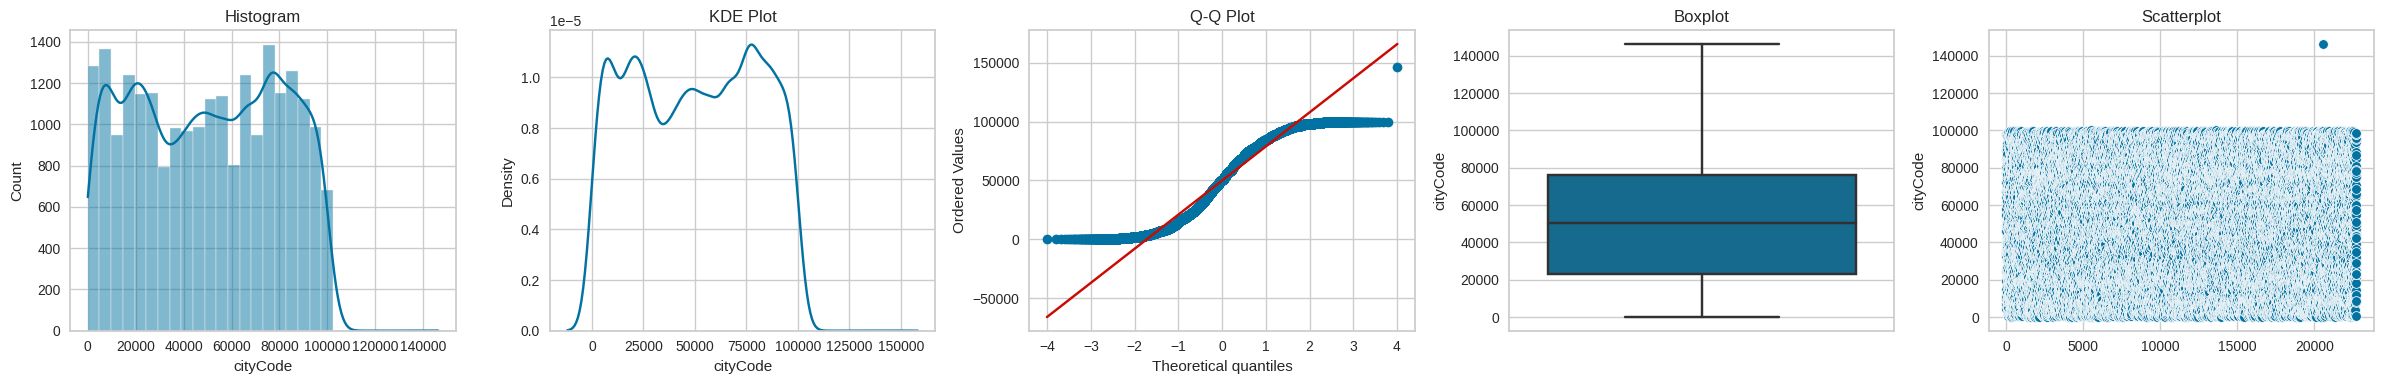

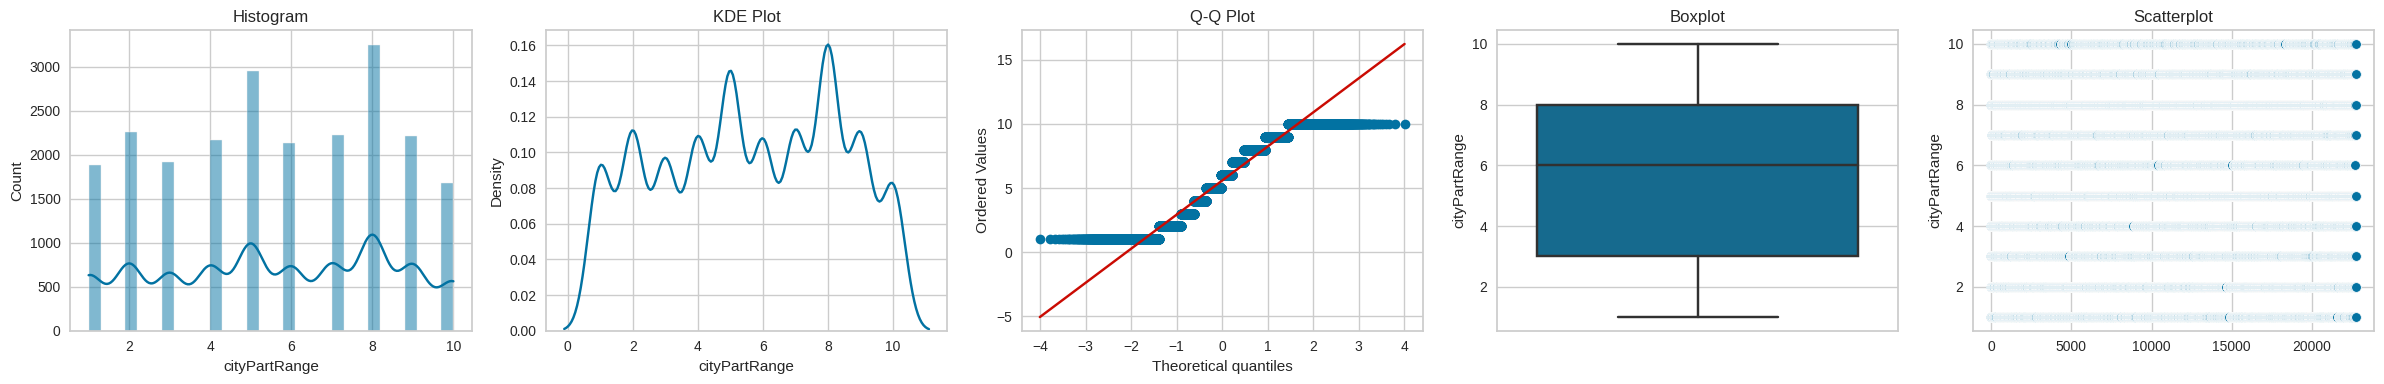

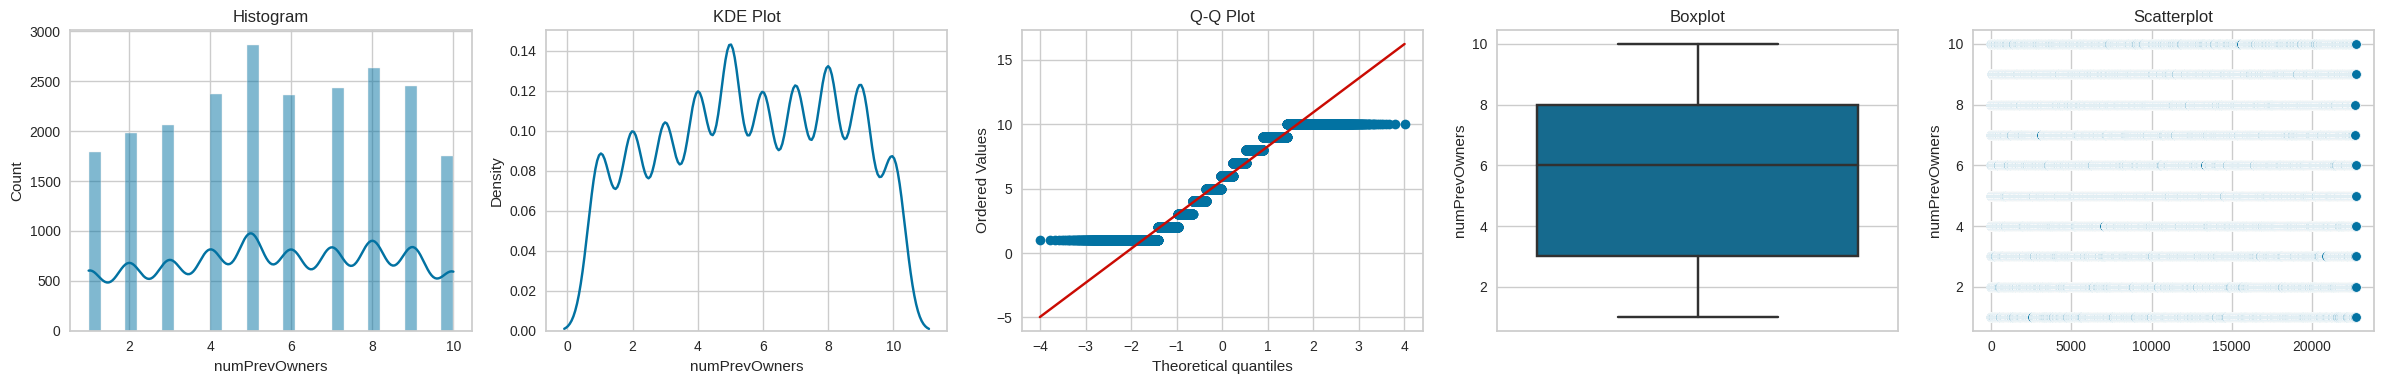

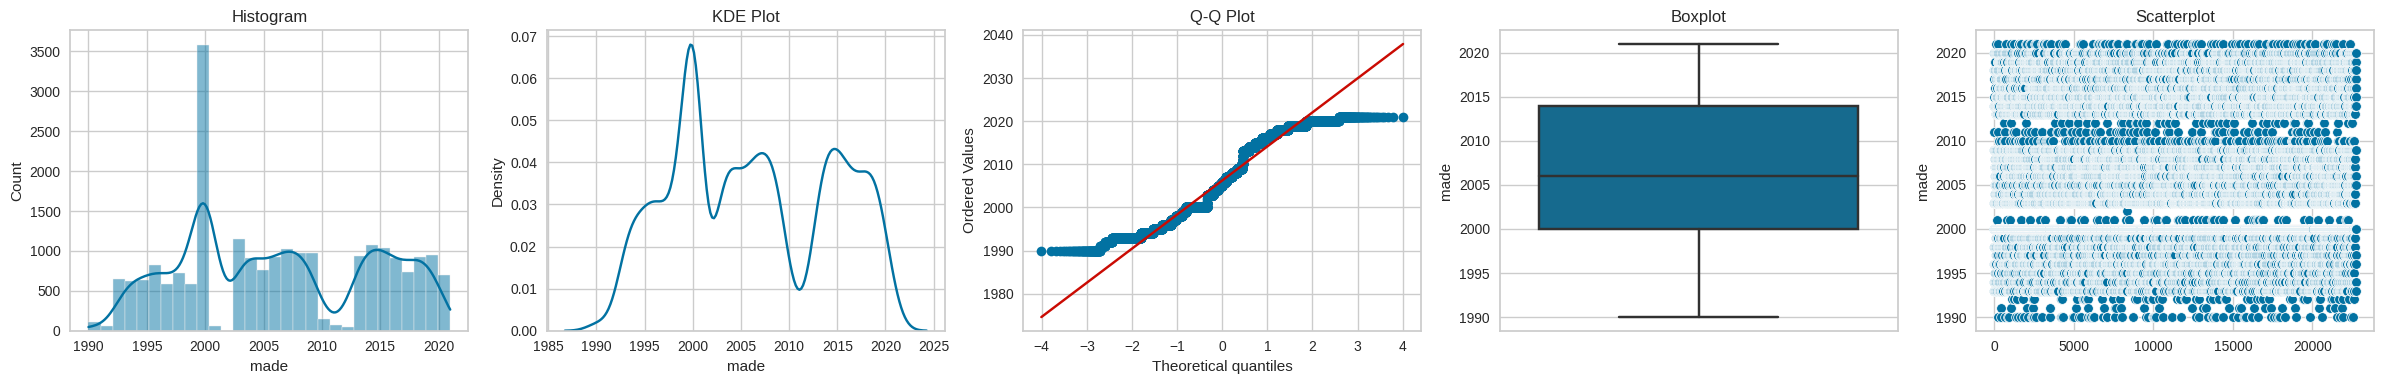

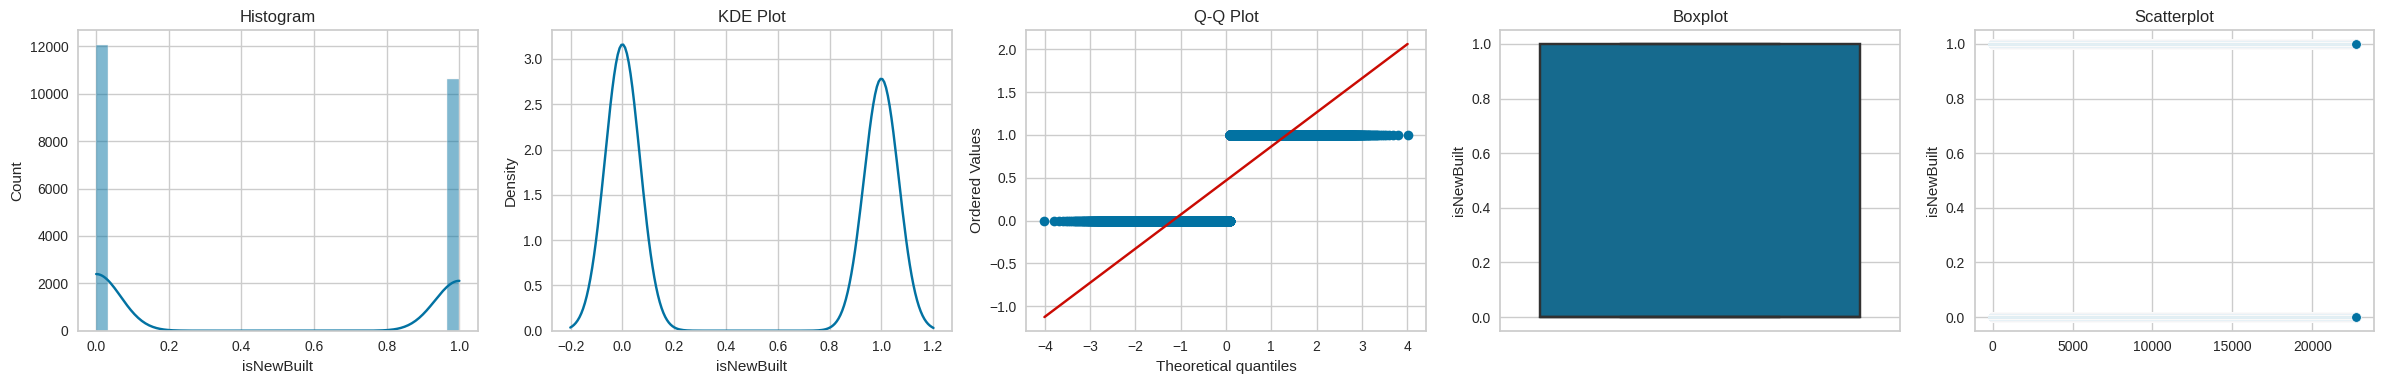

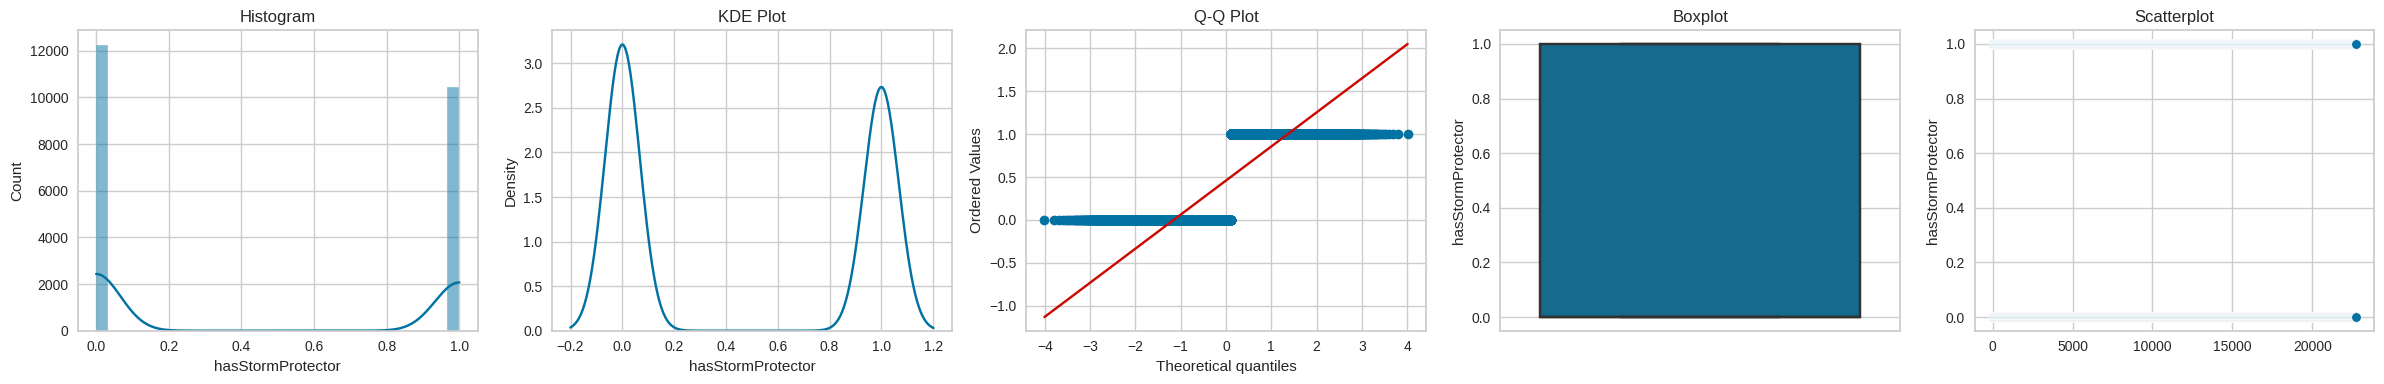

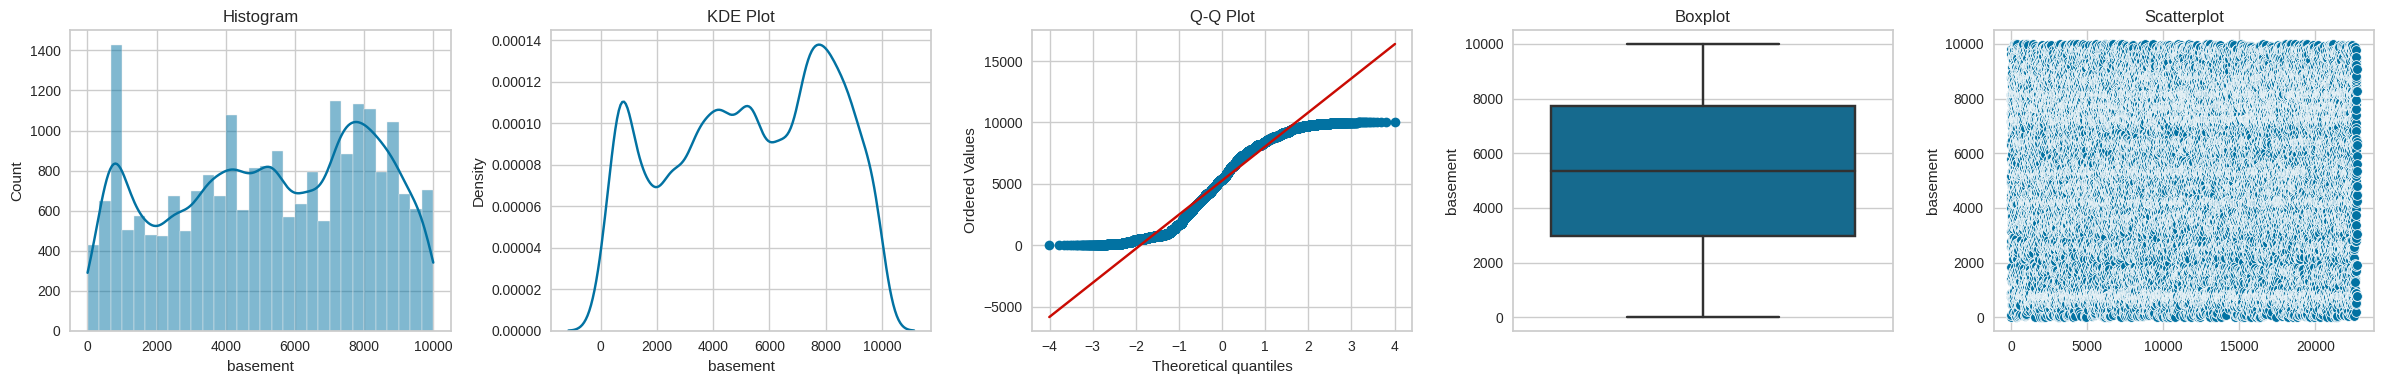

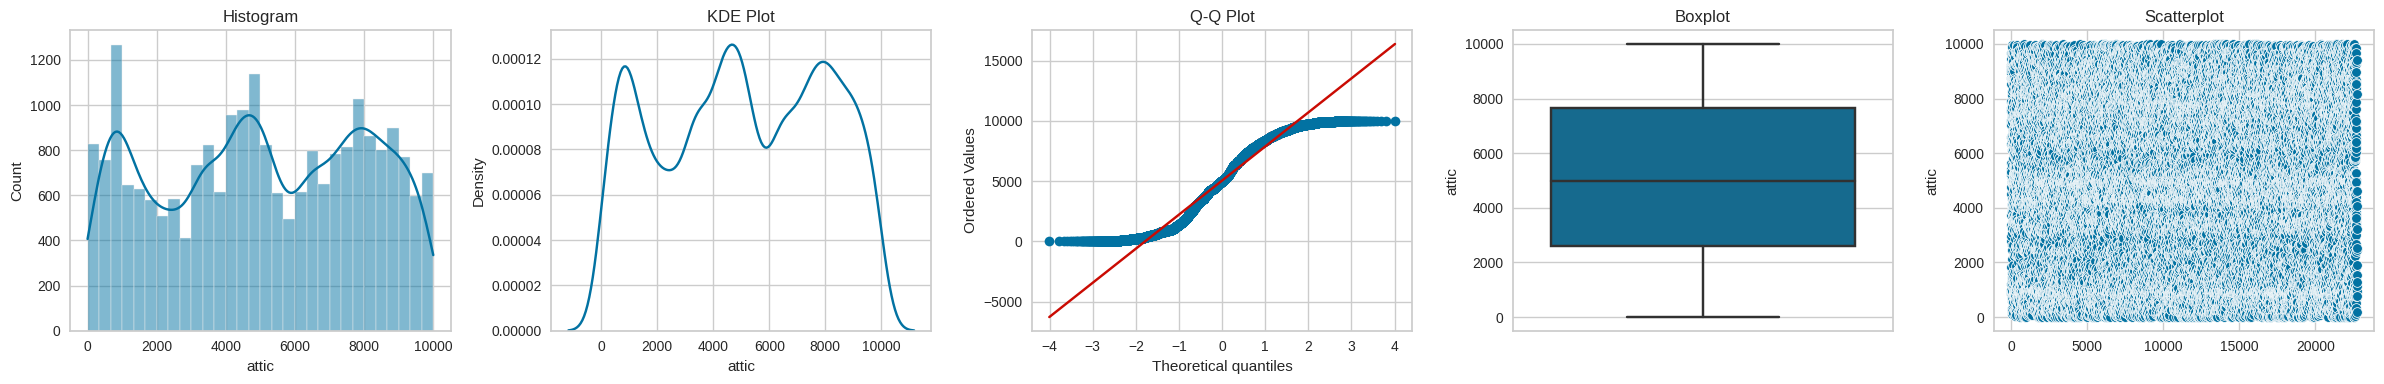

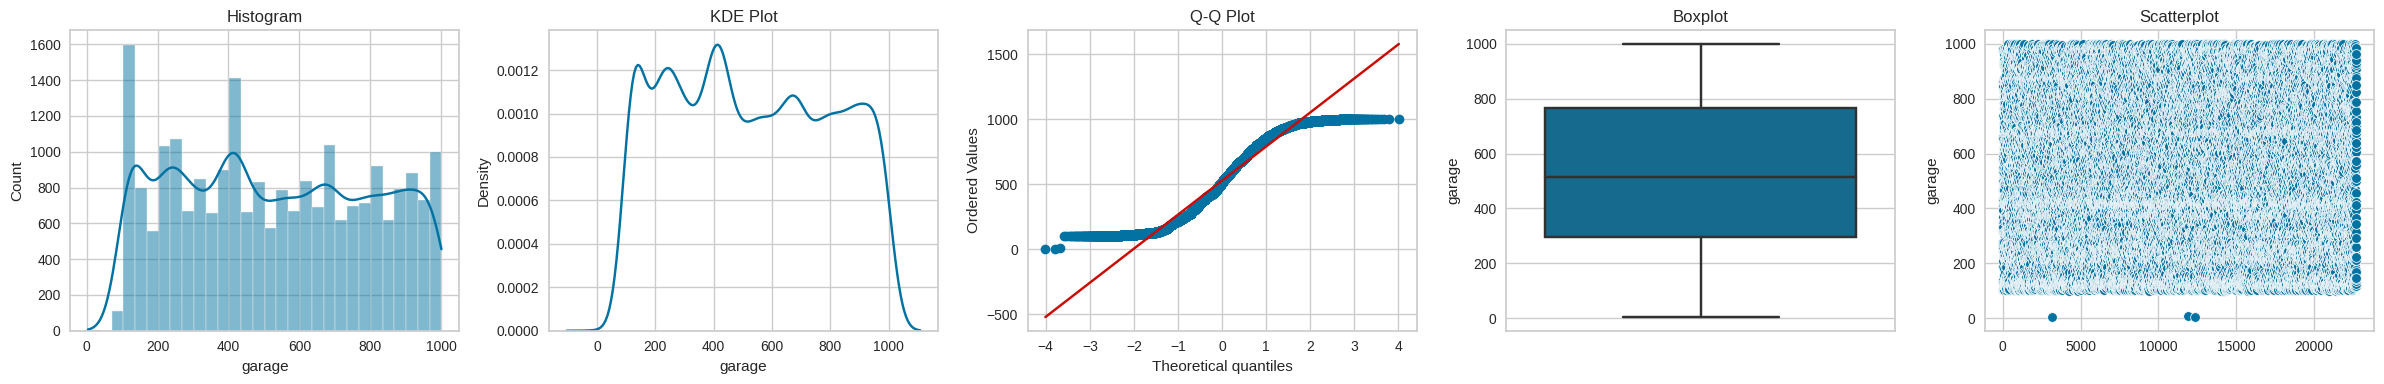

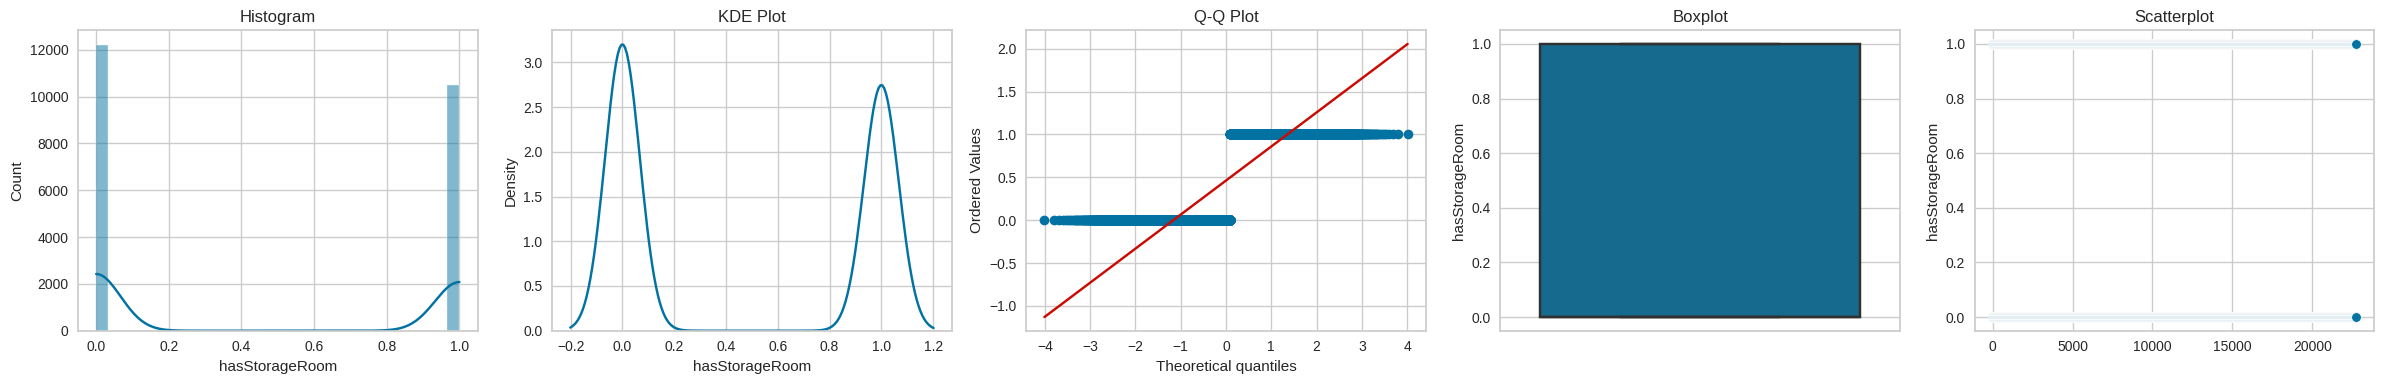

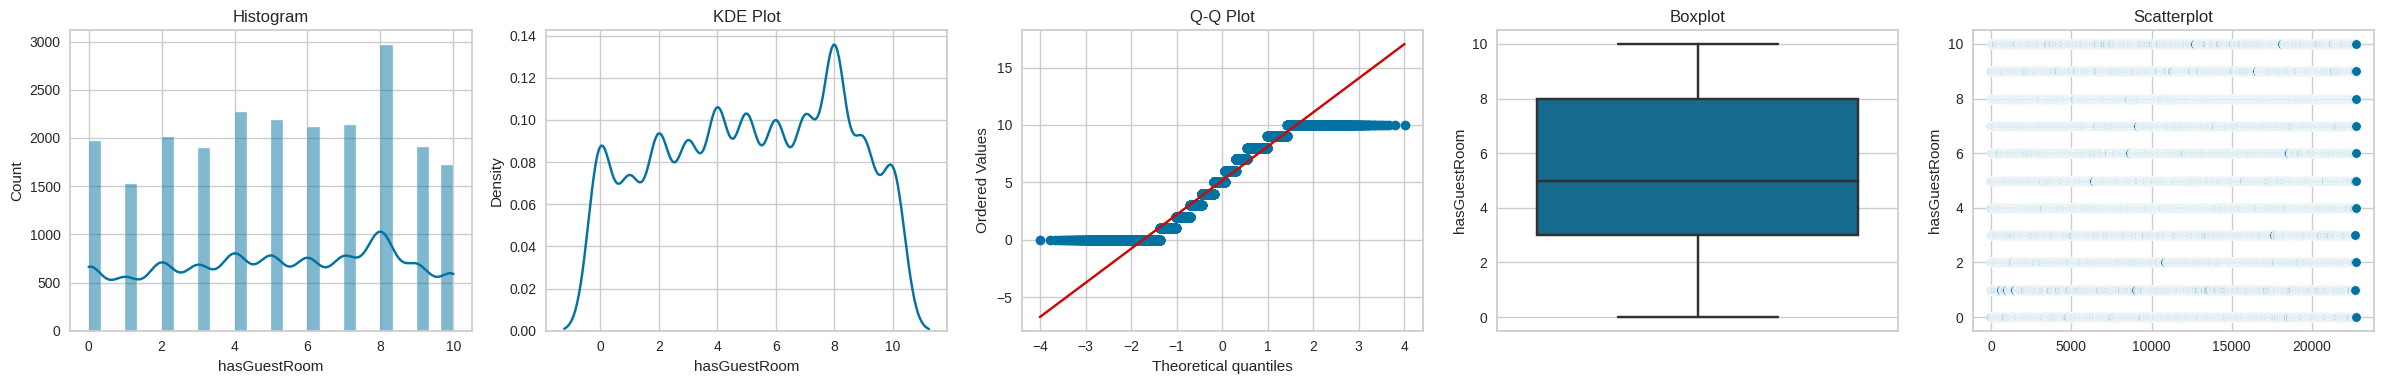

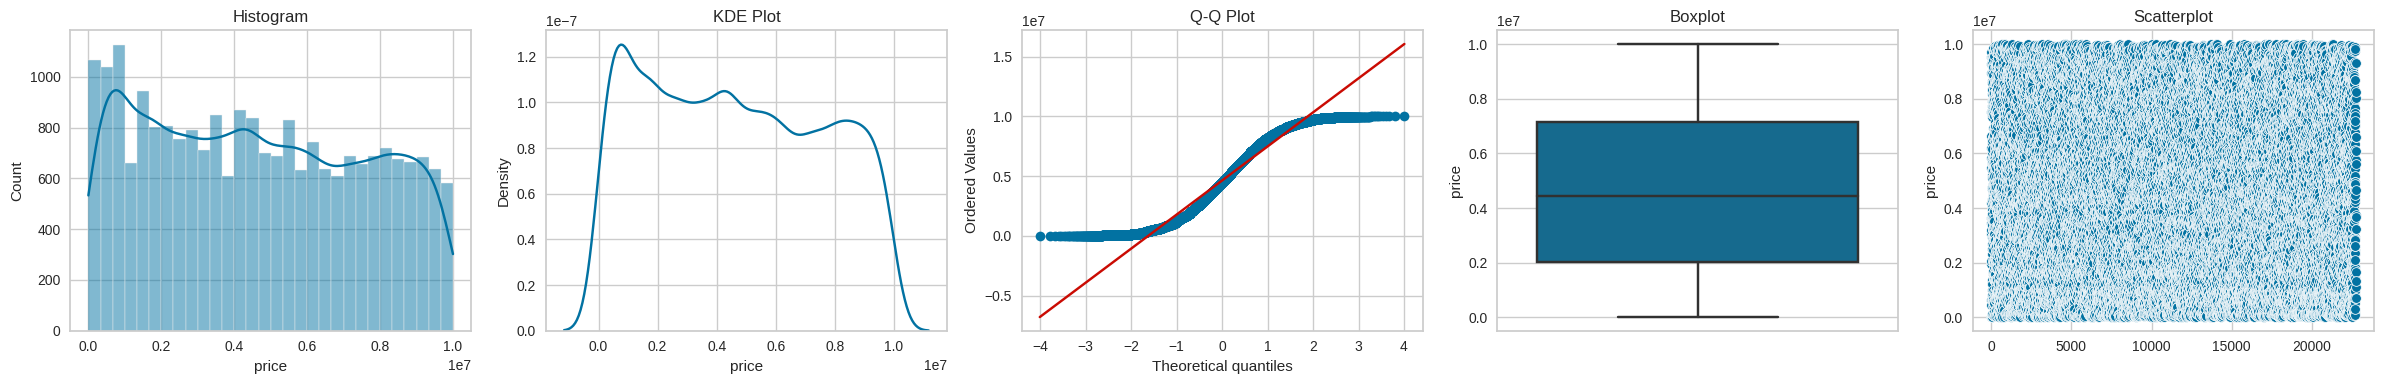

TypeError: The x variable is categorical, but one of ['numeric', 'datetime'] is required

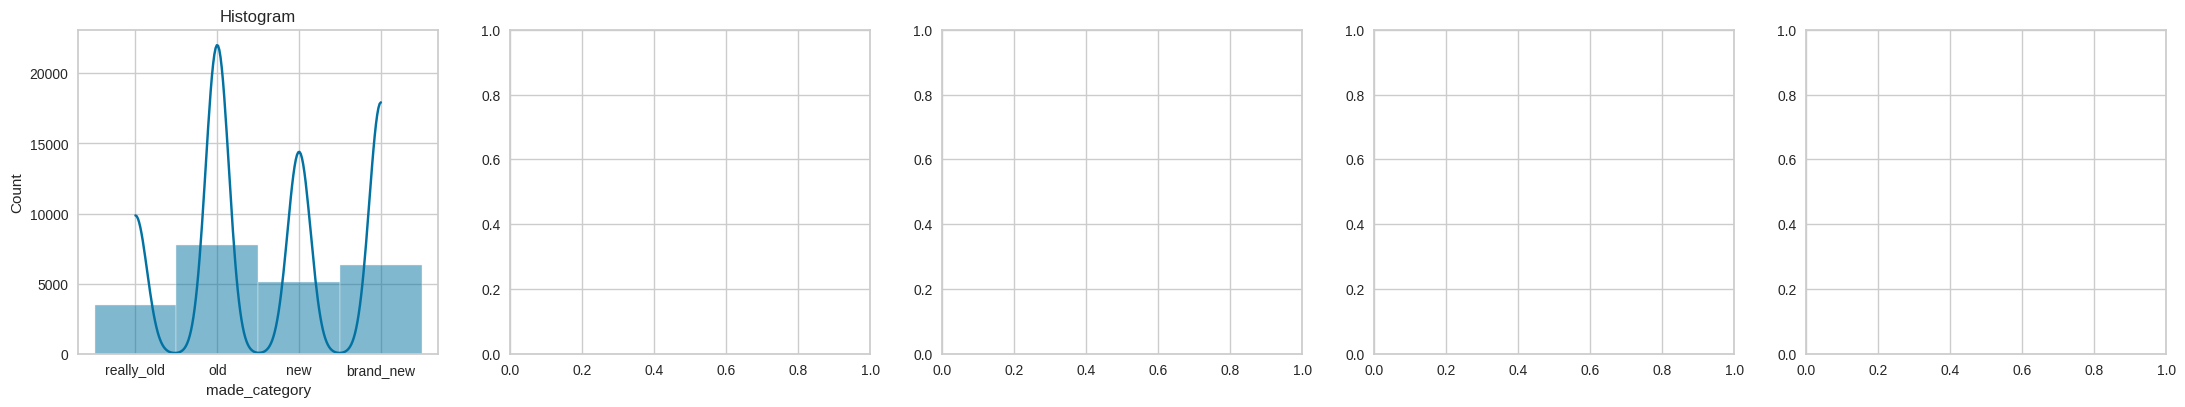

In [15]:
def plots(df, variable):
    # define figure size
    fig, ax = plt.subplots(1, 5, figsize=(24, 4))
    
    # histogram
    sns.histplot(df[variable], bins=30, kde=True, ax=ax[0])
    ax[0].set_title('Histogram')
    
    # KDE plot
    sns.kdeplot(df[variable], ax=ax[1])
    ax[1].set_title('KDE Plot')
    
    # Q-Q plots
    stats.probplot(df[variable], dist="norm", plot=ax[2])
    ax[2].set_title('Q-Q Plot')
    
    # boxplot
    sns.boxplot(y=df[variable], ax=ax[3])
    ax[3].set_title('Boxplot')
    
    # scatterplot
    sns.scatterplot(x=df.index, y=df[variable], ax=ax[4])
    ax[4].set_title('Scatterplot')
    
    plt.tight_layout()
    plt.show()

for i in train.columns:
    plots(train ,i)

## Baseline Pipeline

In [20]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

In [124]:
feat_numerical = ['squareMeters', 'numberOfRooms', 'floors', 'numPrevOwners', 'basement', 'attic', 'garage', 'hasGuestRoom']
feat_categorical = ['hasYard', 'hasPool', 'cityPartRange', 'made_category', 'isNewBuilt', 'hasStormProtector', 'hasStorageRoom']

In [125]:
X_baseline = train.drop(columns=['id', 'price', 'cityCode','made'])
y_baseline = train.price

In [24]:
preproc_numerical_baseline = make_pipeline(
    MinMaxScaler())

preproc_categorical_baseline = make_pipeline(
    OneHotEncoder(handle_unknown="ignore"))

preproc_baseline = make_column_transformer(
    (preproc_numerical_baseline, feat_numerical),
    (preproc_categorical_baseline, feat_categorical),
    remainder="drop")

preproc_baseline

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('minmaxscaler',
                                                  MinMaxScaler())]),
                                 ['squareMeters', 'numberOfRooms', 'floors',
                                  'numPrevOwners', 'basement', 'attic',
                                  'garage']),
                                ('pipeline-2',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['hasYard', 'hasPool', 'cityPartRange',
                                  'made_category', 'isNewBuilt',
                                  'hasStormProtector', 'hasStorageRoom',
                                  'hasGuestRoom'])])

In [25]:
pipe_baseline = make_pipeline(preproc_baseline, DecisionTreeRegressor())
pipe_baseline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['squareMeters',
                                                   'numberOfRooms', 'floors',
                                                   'numPrevOwners', 'basement',
                                                   'attic', 'garage']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['hasYard', 'hasPool',
                                                   'cityPartRange',
                                                   'made_category',
                                                   'isNewBuilt',
                                                   'hasStormProtector',
                                                   'hasStorageRoom',
                                                   'hasGuestRoom'])])),
                ('decisiontreeregressor', DecisionTreeRegressor())])

In [26]:
score_baseline = cross_val_score(pipe_baseline, X_baseline, y_baseline, cv=5).mean()
score_baseline

0.9949016614163717

In [126]:
X_test_ids = test['id']
test['made_category'] = pd.cut(x = test['made'],
                                 bins=4, 
                                 labels=['really_old', 'old', 'new', 'brand_new'])
X_test = test.drop(columns=['id', 'cityCode', 'made', 'numberOfRooms', 'floors', 'numPrevOwners', 'basement', 'attic', 'garage', 'hasGuestRoom', 'hasYard', 'hasPool', 'cityPartRange', 'isNewBuilt', 'hasStormProtector', 'hasStorageRoom'])

In [ ]:
pipe_baseline.fit(X_baseline,y_baseline)
y_pred_baseline = pipe_baseline.predict(X_test)
y_pred_baseline

In [31]:
results = pd.concat([X_test_ids, pd.Series(y_pred_baseline, name="price")], axis=1)
results.head(1)

id      price
0  22730  4765943.6

In [32]:
results.to_csv("data/submission_baseline.csv", header=True, index=False)

## Model

In [7]:
from pycaret  import regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import StackingRegressor

In [ ]:
feat_numerical = ['squareMeters']
feat_categorical = ['made_category']

In [8]:
# X = train.drop(columns=['id', 'price', 'cityCode','made', 'numberOfRooms', 'floors', 'numPrevOwners', 'basement', 'attic', 'garage', 'hasGuestRoom', 'hasYard', 'hasPool', 'cityPartRange', 'isNewBuilt', 'hasStormProtector', 'hasStorageRoom'])
X = train.drop(columns=['id', 'price', 'made'])
y = train.price

### PyCaret

In [9]:
regression.setup(X,target=y ,session_id=42)

In [10]:
regression.compare_models()

GradientBoostingRegressor(random_state=42)

In [127]:
preproc_numerical = make_pipeline(
    MinMaxScaler())

preproc_categorical = make_pipeline(
    OneHotEncoder(handle_unknown="ignore"))

preproc = make_column_transformer(
    (preproc_numerical, feat_numerical),
    (preproc_categorical, feat_categorical),
    remainder="drop")

preproc

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('minmaxscaler',
                                                  MinMaxScaler())]),
                                 ['squareMeters']),
                                ('pipeline-2',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['made_category'])])

In [118]:
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import make_scorer

rmsle = make_scorer(lambda y_true, y_pred: mean_squared_log_error(y_true, y_pred)**0.5)

rmsle_neg = make_scorer(lambda y_true, y_pred: -1 * mean_squared_log_error(y_true, y_pred)**0.5)

In [119]:
allow_grid_searching = True

from tempfile import mkdtemp
from shutil import rmtree
cachedir = mkdtemp()

### Ridge

In [128]:
model = Ridge(alpha=0.5)
pipe_ridge = make_pipeline(preproc, model, memory=cachedir)
cross_val_score(pipe_ridge, X, y, cv=5, scoring=rmsle).mean()

0.10251903007509641

In [ ]:
# pipe_ridge.get_params()

In [ ]:
if allow_grid_searching:
    param_grid =  {'ridge__alpha': np.linspace(0.5,2,num=20)}
    search_ridge = GridSearchCV(pipe_ridge, param_grid=param_grid, 
                              cv=5, n_jobs=-1, verbose=2, scoring=rmsle_neg)

    search_ridge.fit(X, y);
    print(search_ridge.best_params_)
    search_ridge.best_score_

### Lasso

In [92]:
model = Lasso(alpha=2)
pipe_lasso = make_pipeline(preproc, model, memory=cachedir)
cross_val_score(pipe_lasso, X, y, cv=5, scoring=rmsle).mean()

0.10312953619693366

In [ ]:
# pipe_lasso.get_params()

In [93]:
if allow_grid_searching:
    param_grid =  {'lasso__alpha': np.linspace(0.5,2,num=20)}
    search_ridge = GridSearchCV(pipe_lasso, param_grid=param_grid, 
                              cv=5, n_jobs=-1, verbose=2, scoring=rmsle_neg)

    search_ridge.fit(X, y);
    print(search_ridge.best_params_)
    search_ridge.best_score_

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END ...................................lasso__alpha=0.5; total time=   0.2s
[CV] END ...................................lasso__alpha=0.5; total time=   0.4s
[CV] END ....................lasso__alpha=0.5789473684210527; total time=   0.2s
[CV] END ...................................lasso__alpha=0.5; total time=   0.3s
[CV] END ....................lasso__alpha=0.5789473684210527; total time=   0.3s
[CV] END ....................lasso__alpha=0.5789473684210527; total time=   0.5s
[CV] END ....................lasso__alpha=0.6578947368421053; total time=   0.2s
[CV] END ....................lasso__alpha=0.5789473684210527; total time=   0.3s
[CV] END ....................lasso__alpha=0.6578947368421053; total time=   0.2s
[CV] END ....................lasso__alpha=0.7368421052631579; total time=   0.2s
[CV] END ....................lasso__alpha=0.6578947368421053; total time=   0.4s
[CV] END ....................lasso__alpha=0.657

### ElasticNet

In [70]:
model = ElasticNet()
pipe_Elastic = make_pipeline(preproc, model, memory=cachedir)
cross_val_score(pipe_Elastic, X, y, cv=5, scoring=rmsle).mean()

1.1107468437440464

### XGBoost

In [132]:
model_xgb = XGBRegressor(max_depth=10, n_estimators=600, learning_rate=0.1)

In [133]:
pipe_xgb = make_pipeline(preproc, model_xgb)
cross_val_score(pipe_xgb,X,y,cv=5,scoring=rmsle,n_jobs=-1).mean()

0.09960096181248525

In [ ]:
# pipe_xgb.get_params()

In [ ]:
if allow_grid_searching:
    grid = {
        #  'xgbregressor__learning_rate': [0.1, 0.5, 1],
        #  'xgbregressor__max_depth': [8, 10, 12],
        #  'xgbregressor__n_estimators': [200, 400, 600]
    }

    search_xgb = GridSearchCV(pipe_xgb, param_grid=grid, 
                              cv=5, n_jobs=-1, verbose=2, scoring=rmsle)

    search_xgb.fit(X, y);
    print(search_xgb.best_params_)
    search_xgb.best_score_

In [105]:
from sklearn.inspection import permutation_importance

# Fit model
model = pipe_xgb.fit(X,y) 

# Performs Permutation
permutation_score = permutation_importance(model, X, y, n_repeats=10) 

# Unstack results showing the decrease in performance after shuffling features
importance_df = pd.DataFrame(np.vstack((X.columns,
                                        permutation_score.importances_mean)).T) 
importance_df.columns=['feature','score decrease']

# Show the important features
importance_df.sort_values(by="score decrease", ascending = False)

feature score decrease
0        squareMeters       2.001123
14      made_category       0.001451
13       hasGuestRoom       0.000736
11             garage       0.000358
5       cityPartRange       0.000351
1       numberOfRooms        0.00032
9            basement       0.000312
4              floors       0.000305
6       numPrevOwners        0.00022
10              attic       0.000035
7          isNewBuilt       0.000002
12     hasStorageRoom       0.000002
3             hasPool       0.000001
2             hasYard            0.0
8   hasStormProtector            0.0

### Stacking

In [66]:
gboost = GradientBoostingRegressor(n_estimators=100)
ridge = Ridge(alpha=0.5)
svm = SVR(C=1, epsilon=0.05)
adaboost = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=None))

model = StackingRegressor(
    estimators=[("gboost", gboost),("adaboost", adaboost),("ridge", ridge), ("svm_rbf", svm)],
    
    final_estimator=LinearRegression(),
    cv=5,
    n_jobs=-1
)

pipe_stacking = make_pipeline(preproc, model, memory=cachedir)
score = cross_val_score(pipe_stacking, X, y, cv=5, scoring=rmsle, n_jobs=-1)
print(score.std())
score.mean()

0.008978612721486638


0.1078278148573379

In [ ]:
X_test_ids = test['id']
test['made_category'] = pd.cut(x = test['made'],
                                 bins=4, 
                                 labels=['really_old', 'old', 'new', 'brand_new'])
X_test = test.drop(columns=['id', 'cityCode', 'made', 'numberOfRooms', 'floors', 'numPrevOwners', 'basement', 'attic', 'garage', 'hasGuestRoom', 'hasYard', 'hasPool', 'cityPartRange', 'isNewBuilt', 'hasStormProtector', 'hasStorageRoom'])

In [134]:
pipe_xgb.fit(X,y)
y_pred= pipe_xgb.predict(X_test)
y_pred

array([4766171. , 6218007. , 9055920. , ..., 7359202.5, 7767635. ,
       1822570.2], dtype=float32)

In [135]:
results = pd.concat([X_test_ids, pd.Series(y_pred, name="price")], axis=1)
results.head(1)

id      price
0  22730  4766171.0

In [136]:
results.to_csv("data/submission.csv", header=True, index=False)